<a href="https://colab.research.google.com/github/leocassiosilva/Analise-de-dados/blob/main/Analise_dados_enem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
from google.colab import drive
import pandas
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np

In [59]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
#colunas que serão carregadas do dataframe
colunas = ['NU_INSCRICAO','NU_ANO','CO_MUNICIPIO_RESIDENCIA','NO_MUNICIPIO_RESIDENCIA','CO_UF_RESIDENCIA','SG_UF_RESIDENCIA','NU_IDADE', 'TP_SEXO','TP_COR_RACA','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']

In [61]:
df = pandas.read_csv("/content/drive/MyDrive/analise_dados_enem_2019/DADOS/MICRODADOS_ENEM_2019.csv", sep=";", encoding='ISO-8859-1', usecols=colunas)
df = df.dropna()

In [62]:
#Exibindo dados do dataframe
df

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
3,190001199383,2019,1721000,Palmas,17,TO,25.0,F,1,483.8,503.6,537.3,392.0,460.0
4,190001237802,2019,3118601,Contagem,31,MG,22.0,F,1,513.6,575.5,570.7,677.0,860.0
5,190001782198,2019,5107602,Rondonópolis,51,MT,37.0,M,2,563.7,644.9,564.2,675.3,800.0
6,190001421548,2019,2924009,Paulo Afonso,29,BA,22.0,F,3,484.6,488.4,507.2,594.7,600.0
9,190001592266,2019,3550308,São Paulo,35,SP,17.0,M,1,543.9,548.1,502.5,480.7,400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095257,190005806801,2019,5102504,Cáceres,51,MT,20.0,M,1,391.2,427.3,497.3,531.1,540.0
5095259,190005679853,2019,2211001,Teresina,22,PI,37.0,F,4,414.6,485.9,406.6,423.4,480.0
5095260,190005863627,2019,3550308,São Paulo,35,SP,17.0,F,1,370.3,407.4,506.7,390.7,460.0
5095263,190005771624,2019,1501303,Barcarena,15,PA,33.0,F,3,499.6,507.8,537.0,498.3,540.0


In [63]:
df.dtypes

NU_INSCRICAO                 int64
NU_ANO                       int64
CO_MUNICIPIO_RESIDENCIA      int64
NO_MUNICIPIO_RESIDENCIA     object
CO_UF_RESIDENCIA             int64
SG_UF_RESIDENCIA            object
NU_IDADE                   float64
TP_SEXO                     object
TP_COR_RACA                  int64
NU_NOTA_CN                 float64
NU_NOTA_CH                 float64
NU_NOTA_LC                 float64
NU_NOTA_MT                 float64
NU_NOTA_REDACAO            float64
dtype: object

In [64]:
#informações iddade
idade_resul = df['NU_IDADE']
idade_resul.describe()


count    3.701947e+06
mean     2.117099e+01
std      6.952407e+00
min      1.000000e+01
25%      1.700000e+01
50%      1.900000e+01
75%      2.200000e+01
max      9.200000e+01
Name: NU_IDADE, dtype: float64

In [65]:
#Media da coluna idade
idade_resul.mean()


21.170991913174337

In [66]:
#Seleciona as duas colunas sexo e idade
colunasSelecionadas = ['TP_SEXO', 'NU_IDADE']



In [67]:
#Fazendo a filtragem das colunas selecionadas
sexo_Idade = df.filter(items=colunasSelecionadas)
sexo_Idade

,TP_SEXO,NU_IDADE
3,F,25.0
4,F,22.0
5,M,37.0
6,F,22.0
9,M,17.0
...,...,...
5095257,M,20.0
5095259,F,37.0
5095260,F,17.0
5095263,F,33.0


In [68]:
sexo_Idade.groupby('TP_SEXO').count()

,NU_IDADE
TP_SEXO,
F,2201184
M,1500763


TP_SEXO
F    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
M    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

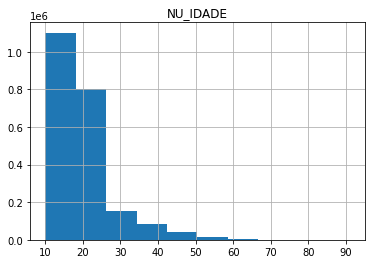

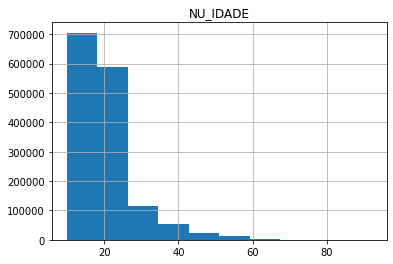

In [69]:
sexo_Idade.groupby('TP_SEXO').hist()

In [70]:
colunasSelecionadas = ['TP_COR_RACA', 'NU_IDADE']


In [71]:
#Fazendo a filtragem das colunas selecionadas
cor_Idade = df.filter(items=colunasSelecionadas)
cor_Idade

,TP_COR_RACA,NU_IDADE
3,1,25.0
4,1,22.0
5,2,37.0
6,3,22.0
9,1,17.0
...,...,...
5095257,1,20.0
5095259,4,37.0
5095260,1,17.0
5095263,3,33.0


In [72]:
cor_Idade = cor_Idade.groupby('TP_COR_RACA').count().sort_values(by='NU_IDADE')

In [73]:
cor_Idade

,NU_IDADE
TP_COR_RACA,
5,21522
0,73432
4,84752
2,453218
1,1374887
3,1694136


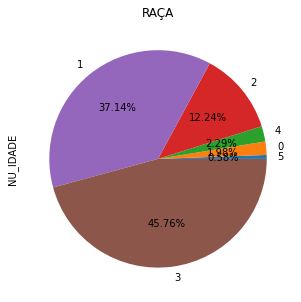

In [77]:
cor_Idade['NU_IDADE'].plot(kind='pie', figsize=(5,5), autopct="%0.2f%%", title="RAÇA")